In [1]:
import fastf1 as ff1
from fastf1 import plotting

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np

In [2]:
ff1.Cache.enable_cache('cache') 

In [3]:
race = ff1.get_session(2022, 'Monza', 'R')
laps = race.load_laps()

C:\Users\emawe\AppData\Local\Programs\Python\Python39\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Italian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']


In [4]:
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())]

In [5]:
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)
intr_qr = q75 - q25
laptime_max = q75 + (1.5 * intr_qr)
laptime_min = q25 - (1.5 * intr_qr)
laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

In [6]:
drivers_to_visualize = ['VER', 'LEC']


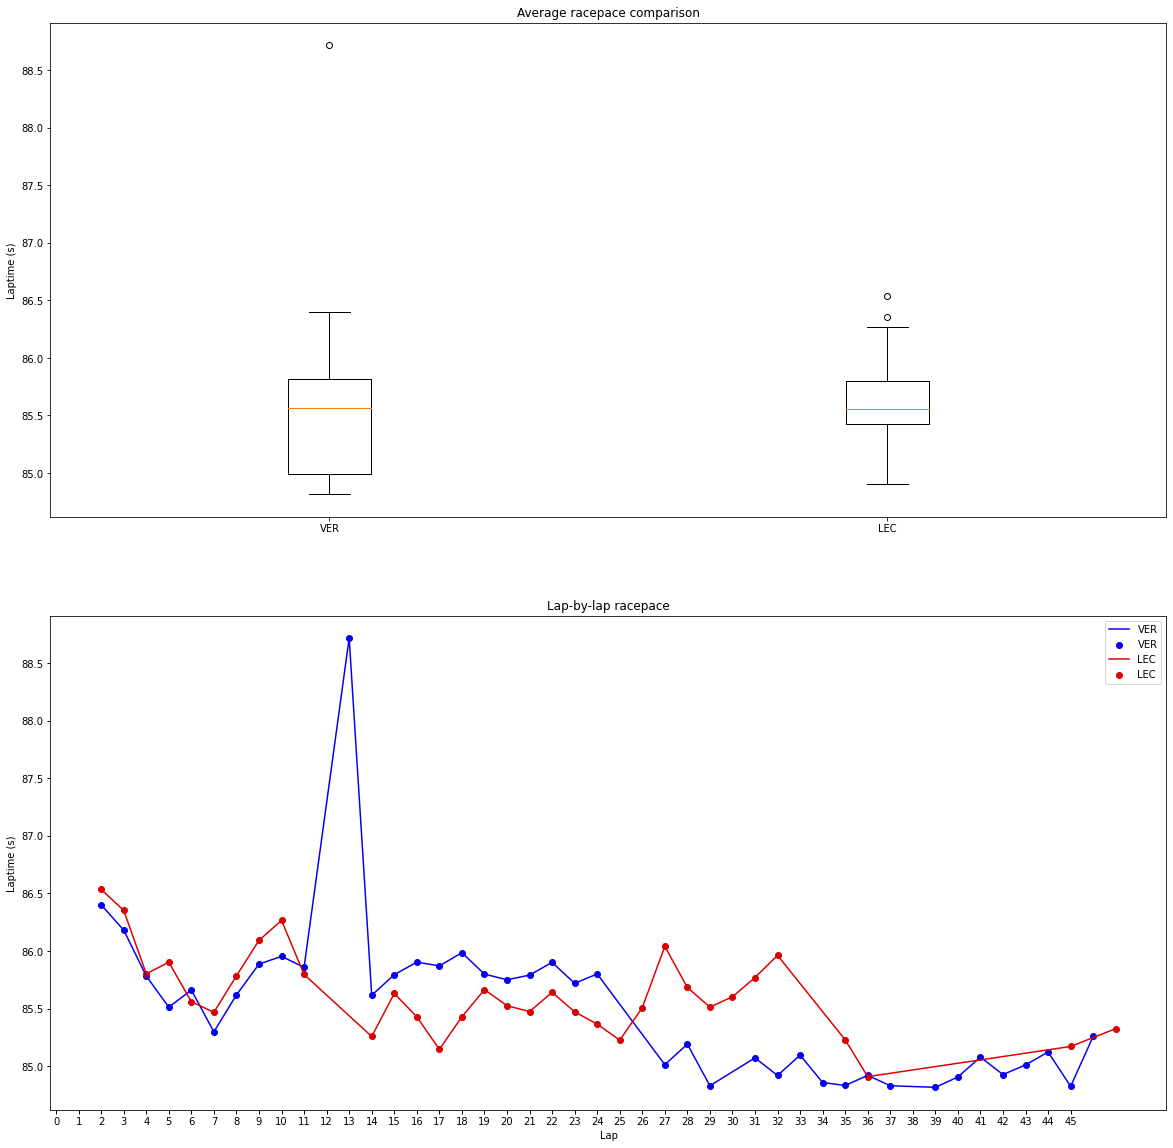

In [8]:
visualized_teams = []
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(2)
laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize] 
ax[0].boxplot(laptimes, labels=drivers_to_visualize)
ax[0].set_title('Average racepace comparison')
ax[0].set(ylabel = 'Laptime (s)')
for driver in drivers_to_visualize:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    driver_laps = driver_laps.dropna()
    team = pd.unique(driver_laps['Team'])[0]
    x = driver_laps['LapNumber']
    y = driver_laps['LapTimeSeconds']
    linestyle = '-' if team not in visualized_teams else ':'
    ax[1].plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle="-")
    scatter_marker = 'o' if team not in visualized_teams else '^' 
    ax[1].scatter(x, y, label=driver, color=ff1.plotting.team_color(team), marker=scatter_marker)
    ax[1].set(ylabel = 'Laptime (s)')
    ax[1].set(xlabel = 'Lap')
    ax[1].tick_params(width = 1)
    ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45])
    ax[1].set_title('Lap-by-lap racepace')
    ax[1].legend()
    visualized_teams.append(team)
    plt.savefig('racepace_comparison.png', dpi=300)